In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
songs = pd.read_csv('songs_data.csv')

In [3]:
audio_features = songs.loc[:, ['danceability', 'energy', 'valence', 'speechiness', 'instrumentalness', 'liveness', 'acousticness']]

<p>I omitted 'tempo' and 'loudness' features because they have different a scale than the others</p>

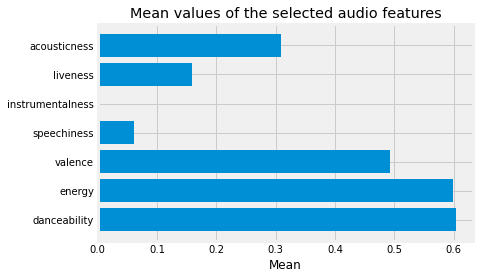

In [4]:
plt.barh(audio_features.columns, audio_features.mean())
plt.xlabel('Mean', fontsize=12)
plt.title('Mean values of the selected audio features')
plt.show()

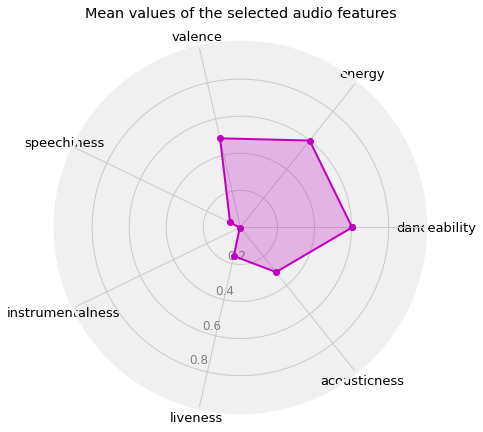

In [5]:
labels = list(audio_features)[:]
stats = audio_features.mean().tolist()
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

stats = np.concatenate((stats, [stats[0]]))
angles = np.concatenate((angles, [angles[0]]))

fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, color='m')
ax.fill(angles, stats, alpha=0.25, facecolor='m')
ax.set_thetagrids(angles * 180/np.pi, labels, fontsize=13)
ax.set_rlabel_position(250)
plt.yticks([0.2, 0.4, 0.6, 0.8], ['0.2', '0.4', '0.6', '0.8'], color='grey', size=12)
plt.ylim(0, 1)
ax.set_title('Mean values of the selected audio features')
ax.grid(True);

<p>The bar and radar chart shows the same thing, which is the means of selected audio features in my Liked Songs list. From those plots I can know that the predominant feature in my list of songs is <strong>energy</strong> and <strong>danceability</strong> - probably because I need that kind of songs to keep me motivated</p> 

In [6]:
songs['tempo'].mean()

120.43737346437332

<p>The mean of tempo of the songs in my list is 120 BPM (Beats per minute) which indicate moderate-to-fast tempo. Well, most of the time I did listen to the upbeat song. Once again, it makes me feel motivated</p>

In [7]:
songs['loudness'].mean()

-6.5011498771498735

Text(0.5, 1.0, 'Standard deviation of each feature')

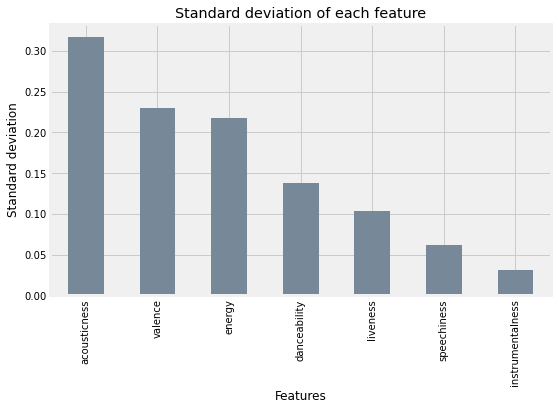

In [8]:
plt.figure(figsize=(8, 5))
audio_features.std().sort_values(ascending=False).plot(kind='bar', color='lightslategray')
plt.xlabel('Features')
plt.ylabel('Standard deviation')
plt.title('Standard deviation of each feature')

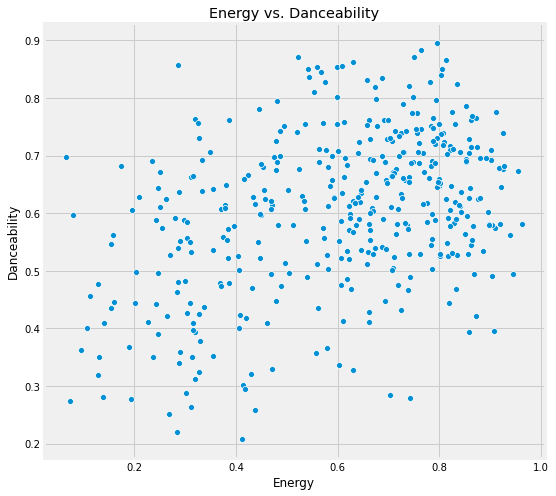

In [9]:
plt.figure(figsize=(8, 8))
sns.scatterplot(audio_features['energy'], audio_features['danceability'])
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title('Energy vs. Danceability')
plt.show()

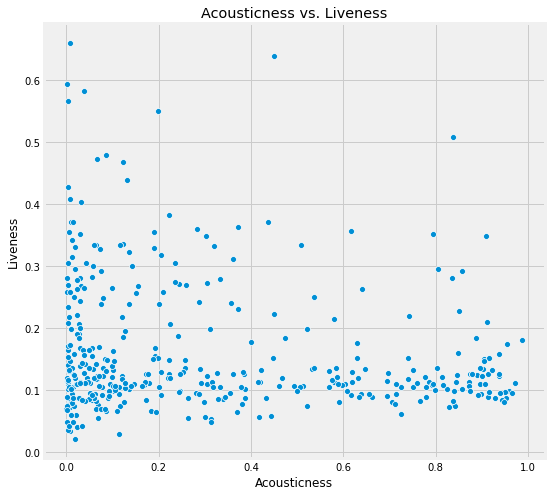

In [10]:
plt.figure(figsize=(8, 8))
sns.scatterplot(audio_features['acousticness'], audio_features['liveness'])
plt.xlabel('Acousticness')
plt.ylabel('Liveness')
plt.title('Acousticness vs. Liveness')
plt.show()

<p>From my list of songs, there are positive correlation between energy and danceability feature, while no exact correlation between acousticness and liveness. It kinda makes sense to think that the more upbeat of the song is the more likely that song to have high score on danceability. Actually, I also want to try to predict popularity of the song based on their audio features using Linear Regression. But, it turns out that the score of the model is so low that I think it needs more than the audio features to predict the popularity. There are a lot of variables that need to be included</p> 